# James Velardi

## April, 26th, 2025

## Project#3

## Sentiment Analysis of Pizza Reviews in Hunterdon County, NJ

### Import Statements

In [1]:
#Import requests to use Yelp API
import requests

#Import Regex
import re

#Import pandas to build a dataframe with the html code
import pandas as pd

# file where client_id and api_key is defined with user's private app information
import yelpkeys  

#Import textblob for version checking
import textblob

#Import TextBlob for sentiment analysis
from textblob import TextBlob

#Import NaiveBayesAnalyzer for more sentimente analysis
from textblob.sentiments import NaiveBayesAnalyzer

#Import version for version checking of textblob
from importlib.metadata import version

#Import matplotlib for version checking
import matplotlib

#Import pyplot to plot our data
import matplotlib.pyplot as plt

#Import seaborn to make our pyplot graphs look cleaner
import seaborn as sns

In [2]:
#Print the version of pandas
print(f'Pandas Version: {pd.__version__}')

#Print the version of matplotlib
print(f'Matplotlib Version: {matplotlib.__version__}')

#Print the version of seaborn
print(f'Seaborn Version: {sns.__version__}')

print(f'TextBlob Version: {version('textblob')}')

print(f'Regex Version: {re.__version__}')

Pandas Version: 2.2.3
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
TextBlob Version: 0.19.0
Regex Version: 2.2.1


### Purpose of this assignment: 

- The main question I have for this data is to try and find a good pizza place in Hunterdon County, NJ. In my experience, it hasn't been the easiest to find a good pizza spot, so I want to do sentiment analysis to see if I can get some ideas.
- Another goal of this assignment is to also see if the review ratings are in alignment with the sentiment analysis.

### Yelp API Boilerplate Code

In [3]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [4]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'pizza'
DEFAULT_LOCATION = 'Hunterdon County, NJ'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [5]:
response = search(API_KEY,DEFAULT_TERM, 'Hunterdon County, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [6]:
response

{'businesses': [{'id': 'd70Vlia02d-Z1PRM7Cyj6Q',
   'alias': 'scuola-vecchia-pizzeria-clinton',
   'name': 'Scuola Vecchia Pizzeria',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/iu7ufTDTWM57xLFVSOU5QQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/scuola-vecchia-pizzeria-clinton?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 14,
   'categories': [{'alias': 'pizza', 'title': 'Pizza'},
    {'alias': 'italian', 'title': 'Italian'},
    {'alias': 'desserts', 'title': 'Desserts'}],
   'rating': 4.4,
   'coordinates': {'latitude': 40.63711519413056,
    'longitude': -74.91053383240532},
   'transactions': [],
   'location': {'address1': '20 Leigh St',
    'address2': '',
    'address3': None,
    'city': 'Clinton',
    'zip_code': '08809',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['20 Leigh St', 'Clinton, NJ 08809']},
   'phone': '+1

In [7]:
#Get our positive, negative, and neutral values for each business and store in a dataframe
df = []

#Initialize reviews for later use
review_words = ""

for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        review_words += str(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
            df.append({'Business': str(business['name']), 'Rating': str(review['rating']), 'Positive': 'Yes', 'Negative': 'No', 'Neutral': 'No'})
        elif sentiment < 0:
            print('    Sentiment: Negative')
            df.append({'Business': str(business['name']), 'Rating': str(review['rating']), 'Positive': 'No', 'Negative': 'Yes', 'Neutral': 'No'})
        else:
            print('    Sentiment: Neutral')
            df.append({'Business': str(business['name']), 'Rating': str(review['rating']), 'Positive': 'No', 'Negative': 'No', 'Neutral': 'Yes'})
        print('\n================\n\n\n')
dataframe = pd.DataFrame(df)

Business Name: Scuola Vecchia Pizzeria
Rating: 4.4
Review Count: 14
Reviews: 
Querying https://api.yelp.com/v3/businesses/d70Vlia02d-Z1PRM7Cyj6Q/reviews ...
 - We love this place!
Service.....5
Ambiance....4 (al fresco)
Margherita pizza.... 5 Heavenly
    Sentiment: Positive




 - Pizza was very good but surprisingly expensive $18 for a 12 inch pie is a little ridiculous. I did not try any of the other dishes and I wish them luck but...
    Sentiment: Negative




 - Super excited to have this place in town. Love that it's located right off the parking lot so, no parallel street parking necessary. They have cute outdoor...
    Sentiment: Positive




Business Name: Frank's Pizzeria of Ringoes
Rating: 4.8
Review Count: 32
Reviews: 
Querying https://api.yelp.com/v3/businesses/y3hwUO0piGwMh7B5PA95_Q/reviews ...
 - Really good pizza in a really fun setting.  Be careful you don't drive right past it.  Looks like it built into the bottom of the side of a house.  Decent...
    Sentiment: Pos

### Display the dataframe with 3 reviews for each business

In [8]:
dataframe

,Business,Rating,Positive,Negative,Neutral
0,Scuola Vecchia Pizzeria,5,Yes,No,No
1,Scuola Vecchia Pizzeria,2,No,Yes,No
2,Scuola Vecchia Pizzeria,5,Yes,No,No
3,Frank's Pizzeria of Ringoes,5,Yes,No,No
4,Frank's Pizzeria of Ringoes,5,Yes,No,No
5,Frank's Pizzeria of Ringoes,5,Yes,No,No
6,Marinelli's Pizza,5,Yes,No,No
7,Marinelli's Pizza,5,Yes,No,No
8,Marinelli's Pizza,5,Yes,No,No
9,Natale's Italian Restaurant and pizza,5,Yes,No,No


In [9]:
positive = dataframe[dataframe['Positive'] == 'Yes']
negative = dataframe[dataframe['Negative'] == 'Yes']
neutral = dataframe[dataframe['Neutral'] == 'Yes']

pos = positive['Positive'].count()
neg = negative['Negative'].count()
neut = neutral['Neutral'].count()


[50, 7, 3]


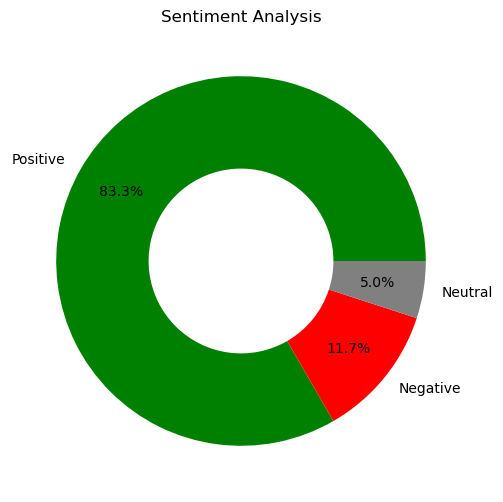

In [10]:
# Define data
labels = ['Positive', 'Negative', 'Neutral']
values = [pos,neg,neut]

print(values)

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), autopct='%1.1f%%', pctdistance=0.75,  colors=['green', 'red','grey'])
ax.set_title('Sentiment Analysis')

plt.show()

### Sentiment analysis using NaiveBayesAnalyzer

In [11]:
#Get our positive, negative, and neutral values for each business and store in a dataframe
df2 = []
#Initialize NaiveBayesAnalyzer model
analyzer = NaiveBayesAnalyzer()
for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'], analyzer=analyzer)
        sentiment = blob.sentiment
        if sentiment.classification == 'pos':
            print('    Sentiment: Positive')
            df2.append({'Business': str(business['name']), 'Rating': str(review['rating']), 'Positive': 'Yes', 'Negative': 'No'})
        elif sentiment.classification == 'neg':
            print('    Sentiment: Negative')
            df2.append({'Business': str(business['name']), 'Rating': str(review['rating']), 'Positive': 'No', 'Negative': 'Yes'})
        print('\n================\n\n\n')
dataframe2 = pd.DataFrame(df2)

Business Name: Scuola Vecchia Pizzeria
Rating: 4.4
Review Count: 14
Reviews: 
Querying https://api.yelp.com/v3/businesses/d70Vlia02d-Z1PRM7Cyj6Q/reviews ...
 - We love this place!
Service.....5
Ambiance....4 (al fresco)
Margherita pizza.... 5 Heavenly
    Sentiment: Positive




 - Pizza was very good but surprisingly expensive $18 for a 12 inch pie is a little ridiculous. I did not try any of the other dishes and I wish them luck but...
    Sentiment: Negative




 - Super excited to have this place in town. Love that it's located right off the parking lot so, no parallel street parking necessary. They have cute outdoor...
    Sentiment: Positive




Business Name: Frank's Pizzeria of Ringoes
Rating: 4.8
Review Count: 32
Reviews: 
Querying https://api.yelp.com/v3/businesses/y3hwUO0piGwMh7B5PA95_Q/reviews ...
 - Really good pizza in a really fun setting.  Be careful you don't drive right past it.  Looks like it built into the bottom of the side of a house.  Decent...
    Sentiment: Pos

In [12]:
dataframe2

,Business,Rating,Positive,Negative
0,Scuola Vecchia Pizzeria,5,Yes,No
1,Scuola Vecchia Pizzeria,2,No,Yes
2,Scuola Vecchia Pizzeria,5,Yes,No
3,Frank's Pizzeria of Ringoes,5,Yes,No
4,Frank's Pizzeria of Ringoes,5,Yes,No
5,Frank's Pizzeria of Ringoes,5,Yes,No
6,Marinelli's Pizza,5,Yes,No
7,Marinelli's Pizza,5,Yes,No
8,Marinelli's Pizza,5,Yes,No
9,Natale's Italian Restaurant and pizza,5,Yes,No


### Get the counts for plotting

In [13]:
positive = dataframe2[dataframe2['Positive'] == 'Yes']
negative = dataframe2[dataframe2['Negative'] == 'Yes']

pos = positive['Positive'].count()
neg = negative['Negative'].count()


[52, 8]


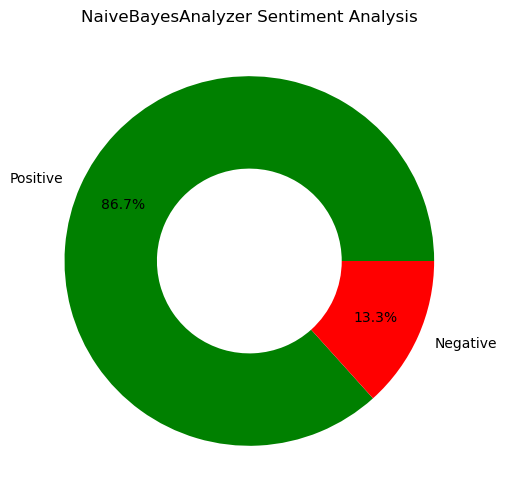

In [14]:
# Define data
labels = ['Positive', 'Negative']
values = [pos,neg]

print(values)

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), autopct='%1.1f%%', pctdistance=0.75,  colors=['green', 'red','grey'])
ax.set_title('NaiveBayesAnalyzer Sentiment Analysis')

plt.show()

### Findings so far

- After comparing the two sentiment analyzers, 3.3% of the neutral reviews in the default Textblob were viewed as positive in the NaiveBayesAnalyzer and 1.7% of the neutal reviews were viewed as negative.
- Also upon briefly viewing the pandas dataframes, I noticed that the review ratings may not be in complete alignment with the sentiment, thus showing the limitations of sentiment analysis.

### Remove the stopwords using nltk

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/james/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords

In [17]:
stops = stopwords.words('english')
stops

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

### Grab the review words from the Yelp API loop used earlier

In [18]:
review_words

"We love this place!\nService.....5\nAmbiance....4 (al fresco)\nMargherita pizza.... 5 HeavenlyPizza was very good but surprisingly expensive $18 for a 12 inch pie is a little ridiculous. I did not try any of the other dishes and I wish them luck but...Super excited to have this place in town. Love that it's located right off the parking lot so, no parallel street parking necessary. They have cute outdoor...Really good pizza in a really fun setting.  Be careful you don't drive right past it.  Looks like it built into the bottom of the side of a house.  Decent...Great pizza!!!\nGreat owner!!!\nLove the home feel!!!\nReno is the most caring person and really enjoys what he does!!!It's surprising that such amazing pizza comes from such a modest location. Frank started this place long, long ago, and now his son, Reno, runs it. The thin...There is a huge variety of items\nTo pick from. Food is always sooo good. The owner is so friendly to all of his customers.Excellent food and service, fir

### Create a dictionary and obtain a count of the review words, but leaving out the stop words and any word that's less than 3 with letters only.

In [19]:
review_dict = {}

for value in review_words.split():
    if value not in stops and re.fullmatch(r'[a-z]{3,}', value):
        review_dict[value] = review_words.count(value)
        
sorted_reviews = dict(sorted(review_dict.items(), key=lambda item: item[1], reverse=True))
sorted_reviews

{'pizza': 38,
 'place': 14,
 'good': 12,
 'food': 9,
 'time': 9,
 'staff': 8,
 'slice': 8,
 'really': 7,
 'day': 7,
 'huge': 6,
 'sauce': 6,
 'cheese': 6,
 'delicious': 6,
 'friend': 6,
 'pie': 5,
 'friendly': 5,
 'nice': 5,
 'wait': 5,
 'order': 5,
 'service': 5,
 'way': 5,
 'work': 5,
 'one': 5,
 'ever': 5,
 'thing': 5,
 'love': 4,
 'try': 4,
 'person': 4,
 'long': 4,
 'always': 4,
 'first': 4,
 'got': 4,
 'get': 4,
 'local': 4,
 'great': 4,
 'would': 4,
 'recommend': 4,
 'come': 4,
 'make': 4,
 'restaurant': 4,
 'right': 3,
 'like': 3,
 'side': 3,
 'say': 3,
 'times': 3,
 'absolutely': 3,
 'pretzel': 3,
 'bread': 3,
 'every': 3,
 'wife': 3,
 'night': 3,
 'pizzeria': 3,
 'eggplant': 3,
 'old': 3,
 'kind': 3,
 'best': 3,
 'crust': 3,
 'crispy': 3,
 'onions': 3,
 'went': 3,
 'think': 3,
 'special': 3,
 'part': 3,
 'made': 3,
 'parking': 2,
 'drive': 2,
 'past': 2,
 'surprising': 2,
 'amazing': 2,
 'variety': 2,
 'items': 2,
 'pick': 2,
 'owner': 2,
 'back': 2,
 'ordered': 2,
 'want': 2

### Display the top 20 most used words to use for our WordCloud.

In [20]:
top_twenty = dict(list(sorted_reviews.items())[:20])
top_twenty

{'pizza': 38,
 'place': 14,
 'good': 12,
 'food': 9,
 'time': 9,
 'staff': 8,
 'slice': 8,
 'really': 7,
 'day': 7,
 'huge': 6,
 'sauce': 6,
 'cheese': 6,
 'delicious': 6,
 'friend': 6,
 'pie': 5,
 'friendly': 5,
 'nice': 5,
 'wait': 5,
 'order': 5,
 'service': 5}

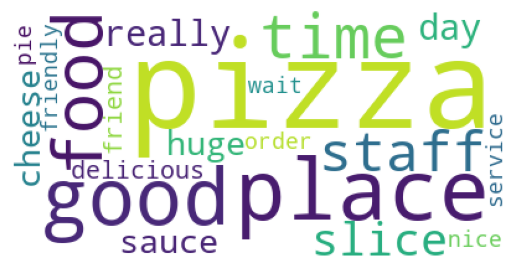

In [21]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white').generate_from_frequencies(top_twenty)

plt.imshow(wc)
plt.axis('off')
plt.show()

### Conclusions Drawn

<p>The overall conclusions I got out of this analysis is that the overall sentiment of pizza places in Hunterdon County, NJ are pretty positive, even though they've been hit or miss in my experience. Also, another conclusion drawn from this is that sentiment analysis is not perfect because the TextBlob models seem to look for frequency of key words. It doesn't take into consideration what the review ratings are. I still believe there's useful data to gain from this, especially when comparing the two analyzing models from TextBlob with and without Neutral reviews. </p>

### Citations

- Stack Overflow. (2010). How do I use a regular expression to match any string but at least 3 characters? Retrieved from https://stackoverflow.com/questions/2590286/how-do-i-use-a-regular-expression-to-match-any-string-but-at-least-3-characters
- freeCodeCamp.org. (2022, March 23). TextBlob Tutorial - Sentiment Analysis, Spelling Correction, and more [Video]. YouTube. https://www.youtube.com/watch?v=rYAasfmgUAE
- Advice on proper use of NaiveBayesAnalyzer was provided by OpenAI's ChatGPT model (2025). When I initially ran the Jupyter cell, it was not loading, so i asked Chatgpt about it. Turns out if you don't initialize the NaiveBayesAnalyzer outside of the loop, the NaiveBayesAnalyzer will have to be retrained each and every single iteration, which was why the Jupyter cell was taking too long to load.
- The Yelp API boilerplate was provided by CCM CMP-262 file yelp-fusion.ipynb
- The pyplot donut chart was also provided by CCM CMP-262 file yelp-fusion.ipynb, which was originally from OpenAI's ChatGPT model.
- Hiemer09. (2023). Sentiment Analysis with TextBlob and Yelp Data. RPubs. https://rpubs.com/Hiemer09/1045958